In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

[*********************100%%**********************]  1 of 1 completed


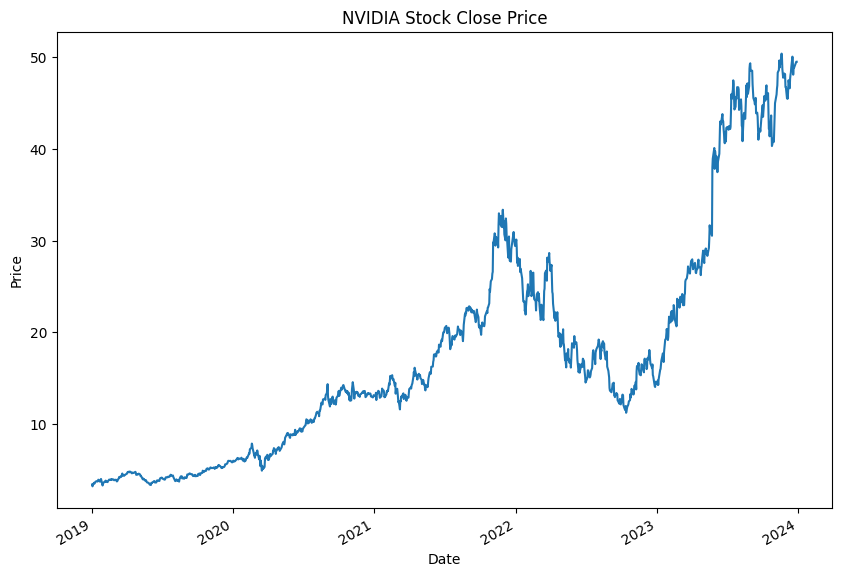

In [2]:
data = yf.download('NVDA', '2019-01-01', '2024-01-01')
data['Close'].plot(figsize=(10,7))
plt.title('NVIDIA Stock Close Price')
plt.ylabel('Price')
plt.show()

In [3]:
# Define long and short window
short_window = 50
long_window = 200

# Calculate moving averages
data['short_mavg'] = data['Close'].rolling(short_window).mean()
data['long_mavg'] = data['Close'].rolling(long_window).mean()



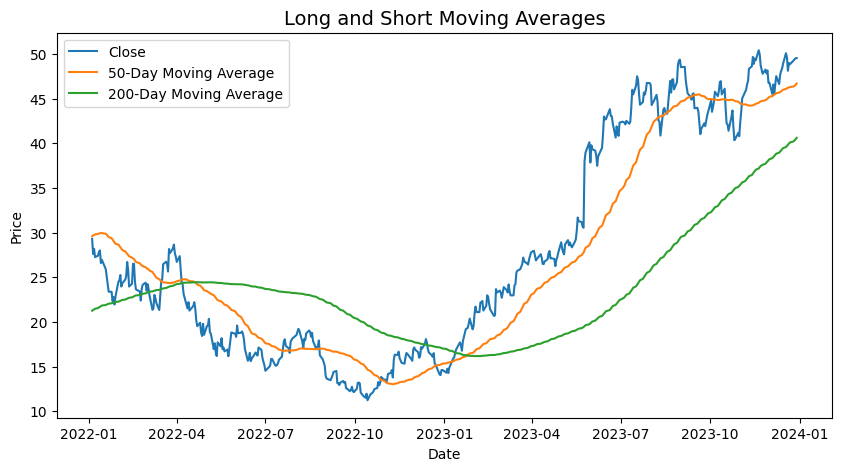

In [4]:
# Plot close price and moving averages
plot_data = data[-500:]
plt.figure(figsize=(10, 5))
plt.title('Long and Short Moving Averages', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(plot_data['Close'], label='Close')
plt.plot(plot_data['short_mavg'], label='50-Day Moving Average')
plt.plot(plot_data['long_mavg'], label='200-Day Moving Average')
plt.legend()


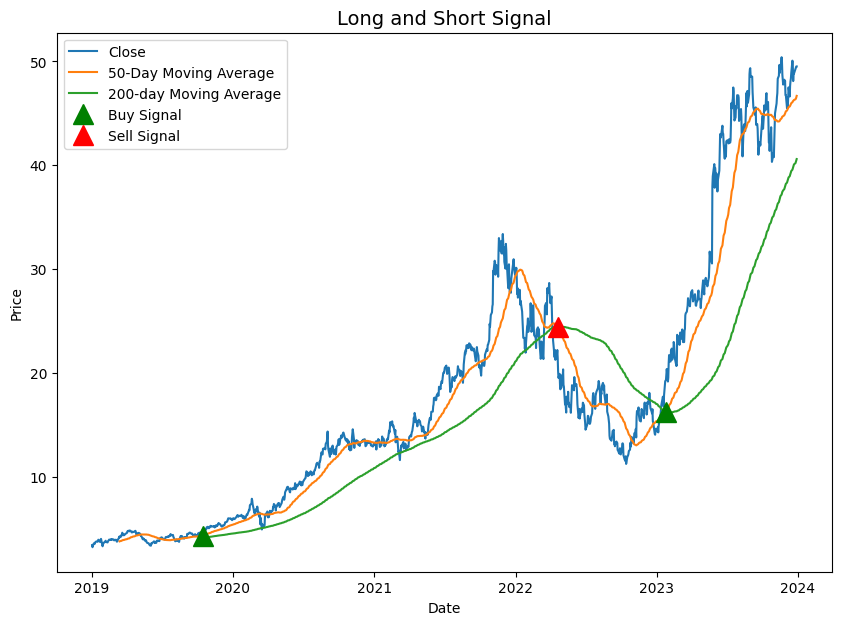

In [5]:
# Take long positions
data['long_positions'] = np.where(data['short_mavg'] > data['long_mavg'], 1, 0)

# Take short positions
data['short_positions'] = np.where(data['short_mavg'] < data['long_mavg'], -1, 0)
data['positions'] = data['long_positions'] + data['short_positions']

# Plot close price and moving averages
plot_data = data[-3000:]
plt.figure(figsize=(10, 7))
plt.title('Long and Short Signal', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(plot_data['Close'], label='Close')
plt.plot(plot_data['short_mavg'], label='50-Day Moving Average')
plt.plot(plot_data['long_mavg'], label='200-day Moving Average')
plt.plot(plot_data[(plot_data['long_positions'] == 1) &
(plot_data['long_positions'].shift(1) == 0)]['short_mavg'],
'^', ms=15, label='Buy Signal', color='green')
plt.plot(plot_data[(plot_data['short_positions'] == -1) &
(plot_data['short_positions'].shift(1) == 0)]['short_mavg'],
'^', ms=15, label='Sell Signal', color='red')
plt.legend()
plt.show()


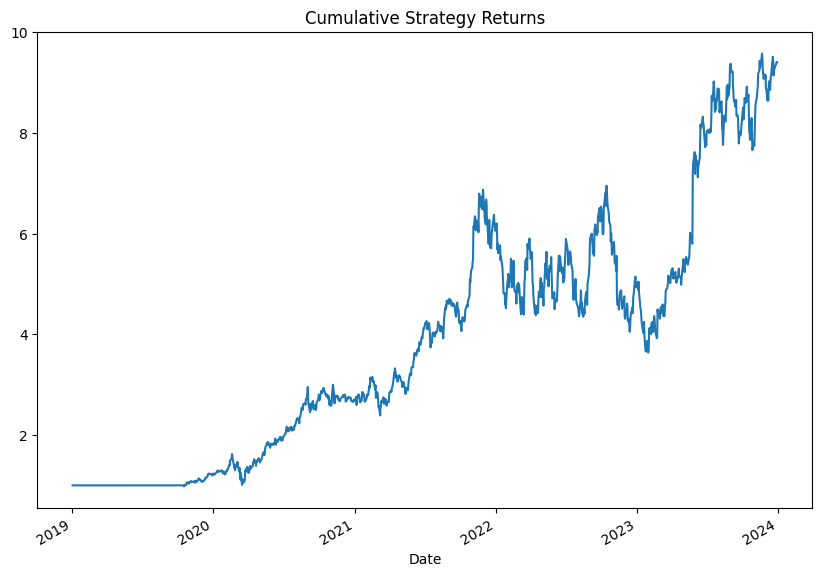

In [6]:
# Calculate daily returns
data['returns'] = data['Close'].pct_change()

# Calculate strategy returns
data['strategy_returns'] = data['returns'] * data['positions'].shift(1)

# Plot cumulative returns
cumulative_returns = (data['strategy_returns'] + 1).cumprod()
cumulative_returns.plot(figsize=(10, 7))
plt.title('Cumulative Strategy Returns')
plt.show()
